# Relatório de análise do covid-19
---

## Introdução

In [1]:
# Desativando os avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando módulo para análise de dados
import pandas as pd

# URI com os dados
uri = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# Criando a variável com o dataframe
confirmados = pd.read_csv(uri)

# Explorando as 5 primeiras observações do dataframe
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/23,1/14/23,1/15/23,1/16/23,1/17/23,1/18/23,1/19/23,1/20/23,1/21/23,1/22/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207900,207900,207900,207993,208009,208034,208062,208084,208084,208084
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334018,334029,334037,334037,334064,334084,334084,334084,334097,334101
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271286,271287,271287,271287,271292,271296,271307,271316,271328,271335
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47781,47781,47781,47781,47781,47781,47820,47820,47820,47820
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095


In [3]:
# Dimensão do dataframe
confirmados.shape

(289, 1101)

In [4]:
# Países do dataframe
confirmados['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [5]:
confirmados['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [6]:
# Total de casos confirmados por país
confirmados_por_pais = confirmados.groupby(by = 'Country/Region').sum()

<AxesSubplot:>

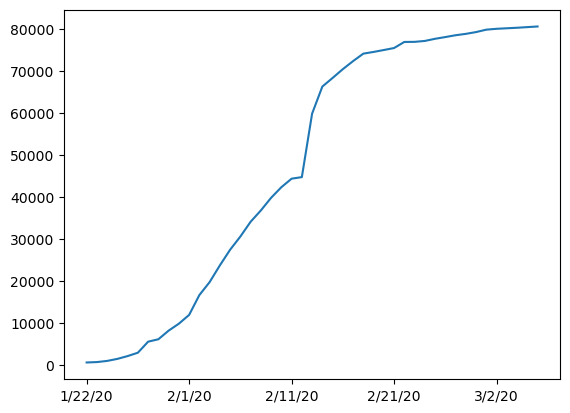

In [7]:
# Criando uma time series com casos confirmados na China
ts_china = confirmados_por_pais.loc['China'][2:47]

# Visualizando a time series
ts_china.plot()

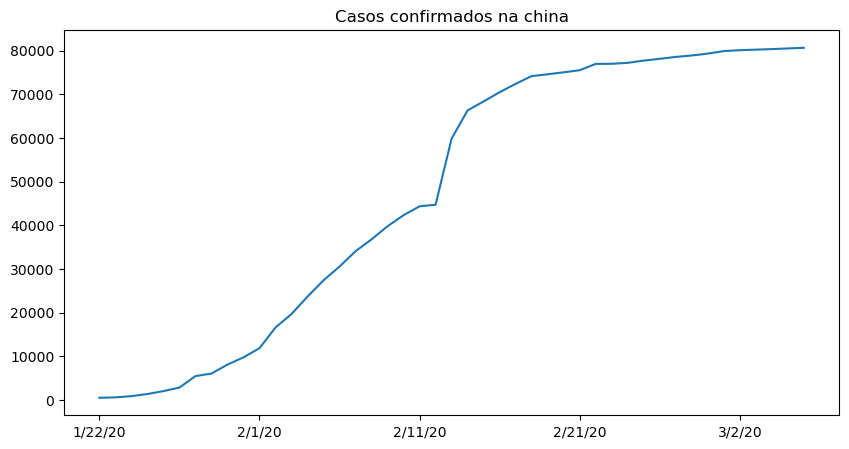

In [8]:
# Importando biblioteca para visualização de dados
import matplotlib.pyplot as plt

# Definindo dimensões da figura
plt.figure(figsize=(10, 5))

# Plotando o gráfico
ts_china.plot()

# Definindo o título
plt.title('Casos confirmados na china')

# Mostrando o gráfico
plt.show()

Text(0.5, 1.0, 'Casos confirmados no Brasil')

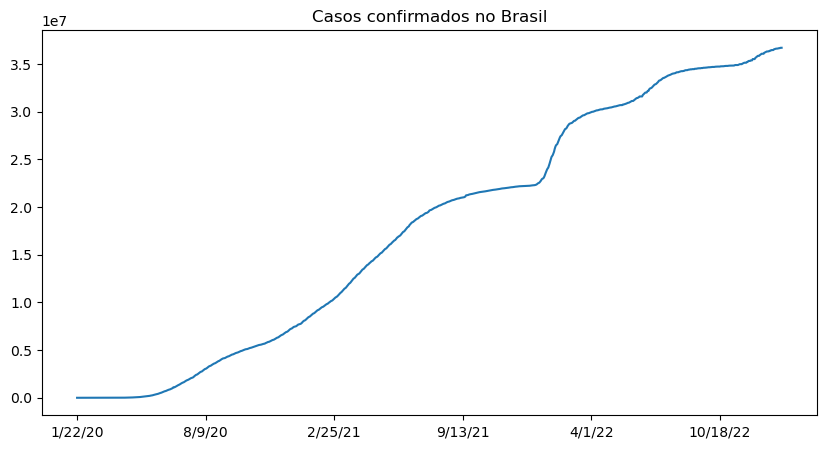

In [9]:
ts_brazil = confirmados_por_pais.loc['Brazil'][2:]

plt.figure(figsize=(10, 5))

ts_brazil.plot()

plt.title('Casos confirmados no Brasil')

Text(0.5, 1.0, 'Novos casos na China')

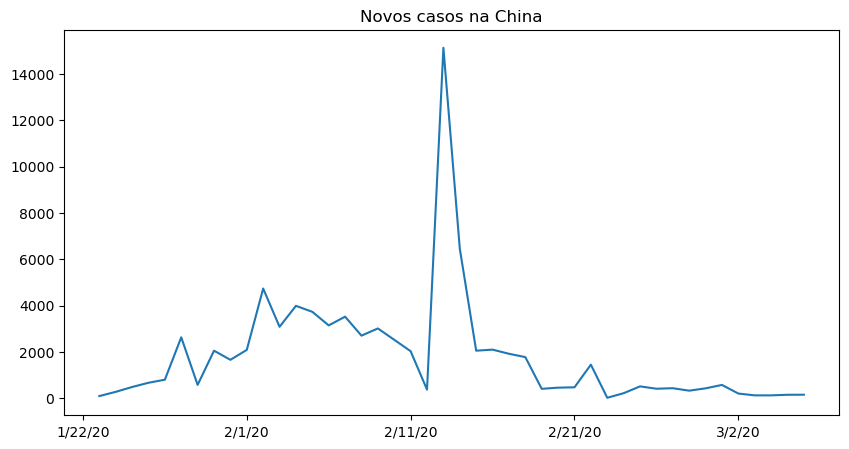

In [10]:
plt.figure(figsize=(10, 5))

ts_china.diff().plot()

plt.title('Novos casos na China')

In [11]:
ultimo_dia = confirmados_por_pais['1/21/23']
ultimo_dia = ultimo_dia.sort_values(ascending=False)

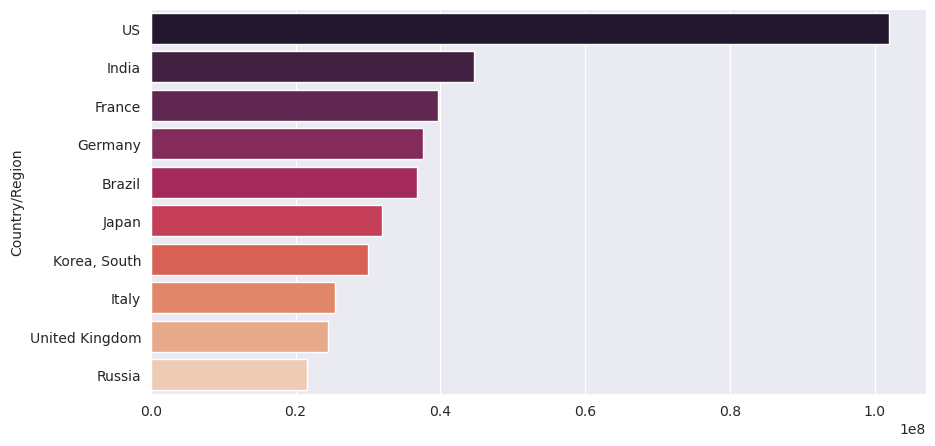

In [12]:
# Importando módulo para visualização de dados
import seaborn as sns

sns.set_style('darkgrid')

ax = sns.barplot(y = ultimo_dia.index[:10], x = ultimo_dia.values[:10], palette='rocket')
ax.figure.set_size_inches(10, 5)

In [13]:
uri = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
mortes = pd.read_csv(uri)
mortes.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/23,1/14/23,1/15/23,1/16/23,1/17/23,1/18/23,1/19/23,1/20/23,1/21/23,1/22/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7854,7854,7854,7857,7859,7860,7864,7864,7864,7864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930


In [14]:
uri = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

recuperados = pd.read_csv(uri)

recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/23,1/14/23,1/15/23,1/16/23,1/17/23,1/18/23,1/19/23,1/20/23,1/21/23,1/22/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Trabalhando com 3 datasets

In [15]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/23,1/14/23,1/15/23,1/16/23,1/17/23,1/18/23,1/19/23,1/20/23,1/21/23,1/22/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207900,207900,207900,207993,208009,208034,208062,208084,208084,208084
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334018,334029,334037,334037,334064,334084,334084,334084,334097,334101
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271286,271287,271287,271287,271292,271296,271307,271316,271328,271335
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47781,47781,47781,47781,47781,47781,47820,47820,47820,47820
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095


In [16]:
mortes.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/23,1/14/23,1/15/23,1/16/23,1/17/23,1/18/23,1/19/23,1/20/23,1/21/23,1/22/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7854,7854,7854,7857,7859,7860,7864,7864,7864,7864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930


In [17]:
recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/23,1/14/23,1/15/23,1/16/23,1/17/23,1/18/23,1/19/23,1/20/23,1/21/23,1/22/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
confirmados.groupby(by = 'Country/Region').sum().iloc[:, -1]

Country/Region
Afghanistan             208084
Albania                 334101
Algeria                 271335
Andorra                  47820
Angola                  105095
                         ...  
West Bank and Gaza      703228
Winter Olympics 2022       535
Yemen                    11945
Zambia                  338986
Zimbabwe                259981
Name: 1/22/23, Length: 201, dtype: int64

In [19]:
def ultimo_por_pais(data):
    return data.groupby(by = 'Country/Region').sum().iloc[:, -1]

In [20]:
informacoes = (ultimo_por_pais(confirmados), ultimo_por_pais(mortes), ultimo_por_pais(recuperados))

In [21]:
df = pd.concat(informacoes, axis = 1)

In [22]:
df.columns = ['confirmados', 'mortes', 'recuperados']

In [23]:
df 

,confirmados,mortes,recuperados
Country/Region,,,
Afghanistan,208084,7864,0
Albania,334101,3596,0
Algeria,271335,6881,0
Andorra,47820,165,0
Angola,105095,1930,0
...,...,...,...
West Bank and Gaza,703228,5708,0
Winter Olympics 2022,535,0,0
Yemen,11945,2159,0


In [24]:
df['letalidade'] = df['mortes'] / df['confirmados']

In [25]:
df.head()

,confirmados,mortes,recuperados,letalidade
Country/Region,,,,
Afghanistan,208084,7864,0,0.037792
Albania,334101,3596,0,0.010763
Algeria,271335,6881,0,0.025360
Andorra,47820,165,0,0.003450
Angola,105095,1930,0,0.018364


In [26]:
def plotar_barplot(s, inicio, fim):
    s = s.sort_values(ascending=False)
    ax = sns.barplot(y = s.index[inicio:fim], x = s.values[inicio:fim], palette='rocket')
    ax.figure.set_size_inches(10, 5)
    return ax

<AxesSubplot:ylabel='Country/Region'>

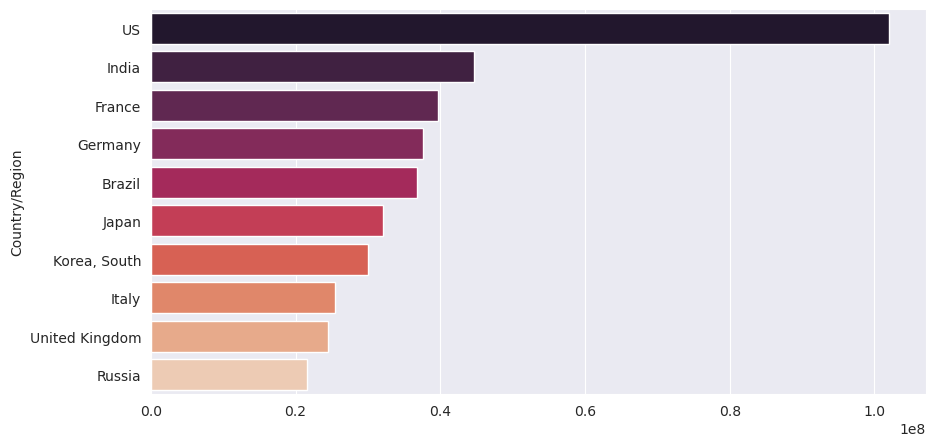

In [27]:
plotar_barplot(df['confirmados'], 0, 10)

<AxesSubplot:ylabel='Country/Region'>

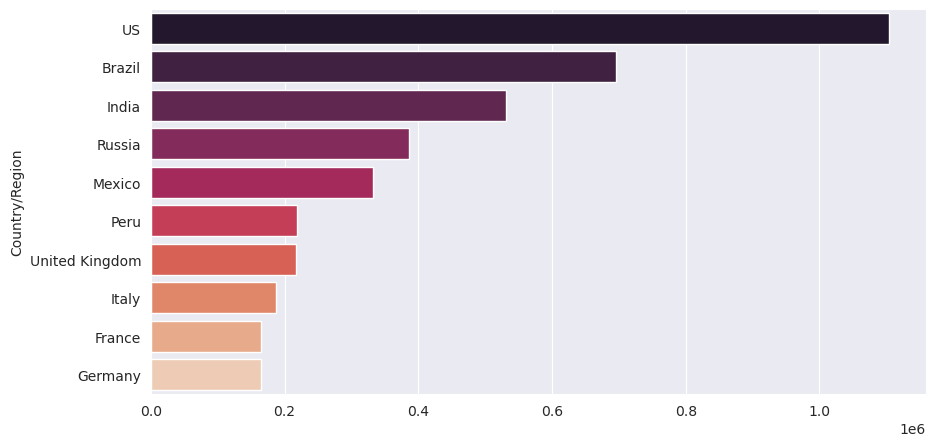

In [28]:
plotar_barplot(df['mortes'], 0, 10)

<AxesSubplot:ylabel='Country/Region'>

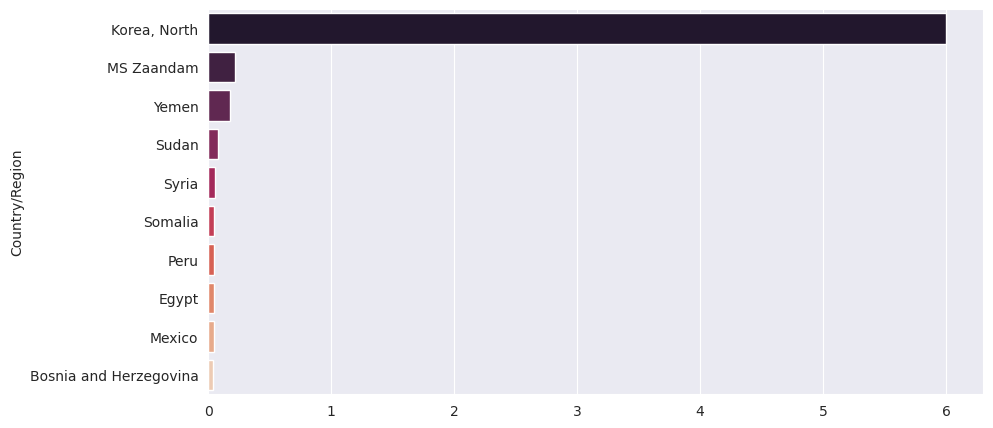

In [29]:
plotar_barplot(df['letalidade'], 0, 10)

<AxesSubplot:xlabel='confirmados', ylabel='letalidade'>

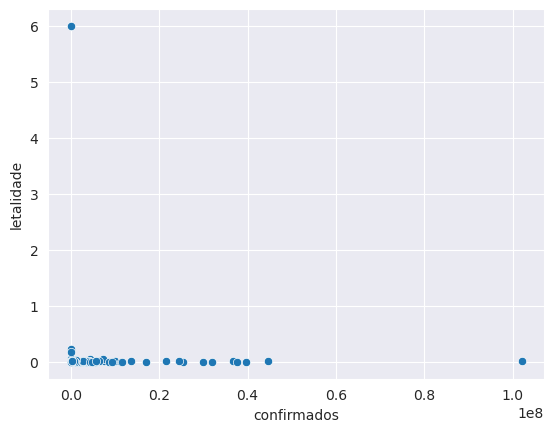

In [37]:
sns.scatterplot(x = 'confirmados', y = 'letalidade', data = df)

<AxesSubplot:xlabel='confirmados', ylabel='letalidade'>

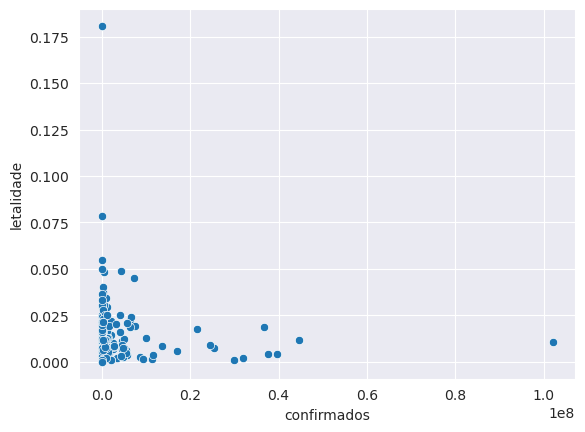

In [40]:
sns.scatterplot(x = 'confirmados', y = 'letalidade', data = df.query('confirmados > 40'))